In [2]:
import pandas as pd
df = pd.read_csv("/Users/alyssaesca/Downloads/deep_sea_corals_floats.csv")
df.head()

,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,DepthInMeters,DepthMethod,Locality,LocationAccuracy,SurveyID,Repository,IdentificationQualifier,SamplingEquipment,RecordType,Date_Collected
0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,959.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,ROV,video observation,2015-09-02
1,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,953.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,ROV,video observation,2015-09-01
2,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,ROV,video observation,2015-09-01
3,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,ROV,video observation,2015-09-01
4,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30902,-158.45425,968.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,ROV,video observation,2015-09-01


In [7]:
# counting unique species and coral types:
print(df['ScientificName'].nunique())
print(df['VernacularNameCategory'].value_counts())

497
VernacularNameCategory
gorgonian coral               32132
lace coral                    14852
demosponge                    13252
glass sponge                  11812
stony coral (branching)       10957
sponge (unspecified)           6833
soft coral                     4609
black coral                    4545
stony coral (cup coral)        1988
sea pen                        1363
stony coral (unspecified)       453
scleromorph sponge              166
stoloniferan coral              151
gold coral                       85
other coral-like hydrozoan       79
calcareous sponge                 1
Name: count, dtype: int64


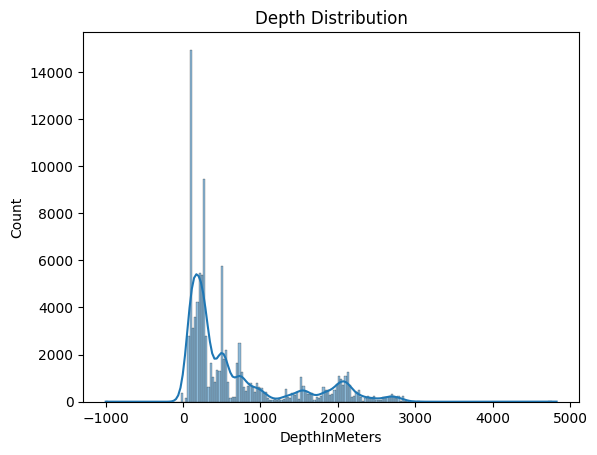

In [8]:
# analyzing depth
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['DepthInMeters'], kde=True)
plt.title("Depth Distribution")
plt.show()

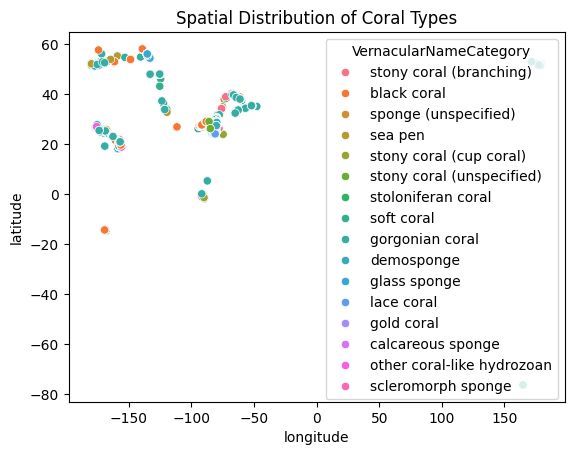

In [9]:
# mapping observations based on latitude and longitude:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='VernacularNameCategory')
plt.title("Spatial Distribution of Coral Types")
plt.show()

In [11]:
# analyzing based on time
data.loc[:, 'ObservationDate'] = pd.to_datetime(data['ObservationDate'])

data.loc[:, 'Year'] = data['ObservationDate'].dt.year

yearly_data = data.groupby('Year').size().reset_index(name='Count')

print(yearly_data)

    Year  Count
0   1902      7
1   1958      1
2   1970      5
3   1972      1
4   1976      1
5   1977     19
6   1978     19
7   1981      2
8   1982      8
9   1983      1
10  1984     12
11  1986     61
12  1987      4
13  1993      1
14  1994      8
15  1995      1
16  1996      3
17  1999      1
18  2000     70
19  2001     13
20  2002    194
21  2003     36
22  2004  15220
23  2005   8486
24  2006  10580
25  2008  31197
26  2009   5899
27  2010   2743
28  2011   9774
29  2012    373
30  2013   1213
31  2015  17315


In [12]:
from scipy.stats import entropy

species_counts = data['ScientificName'].value_counts()
shannon_diversity = entropy(species_counts)
print("Shannon Diversity Index:", shannon_diversity)

Shannon Diversity Index: 3.9093670065242234


In [14]:
# cluster analysis
import pandas as pd
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_data)

data.loc[:, 'Cluster'] = cluster_labels

print(data.head())


                                        DataProvider     ScientificName  \
0  NOAA, Deep Sea Coral Research & Technology Pro...  Madrepora oculata   
1  NOAA, Deep Sea Coral Research & Technology Pro...  Madrepora oculata   
2  NOAA, Deep Sea Coral Research & Technology Pro...  Madrepora oculata   
3  NOAA, Deep Sea Coral Research & Technology Pro...  Madrepora oculata   
4  NOAA, Deep Sea Coral Research & Technology Pro...  Madrepora oculata   

    VernacularNameCategory TaxonRank         Station ObservationDate  \
0  stony coral (branching)   species  D2-EX1504L3-05      2015-09-02   
1  stony coral (branching)   species  D2-EX1504L3-05      2015-09-01   
2  stony coral (branching)   species  D2-EX1504L3-05      2015-09-01   
3  stony coral (branching)   species  D2-EX1504L3-05      2015-09-01   
4  stony coral (branching)   species  D2-EX1504L3-05      2015-09-01   

   latitude  longitude  DepthInMeters DepthMethod  \
0  18.30817 -158.45392          959.0    reported   
1  18.3086

In [18]:
# now focusing on the goal of spliting the data into different time chunks to observe changes over time.
# data starts in 1902 and goes until 2015, so will probably group by decades or larger if needed.
import pandas as pd

data['ObservationDate'] = pd.to_datetime(data['ObservationDate'], errors='coerce', format='%Y-%m-%d')

# Check for any NaT values to identify unparseable dates
unparseable_dates = data[data['ObservationDate'].isna()]

# Print out rows with unparseable dates for review
print("Rows with unparseable dates:")
print(unparseable_dates)


Rows with unparseable dates:
Empty DataFrame
Columns: [DataProvider, ScientificName, VernacularNameCategory, TaxonRank, Station, ObservationDate, latitude, longitude, DepthInMeters, DepthMethod, Locality, LocationAccuracy, SurveyID, Repository, IdentificationQualifier, SamplingEquipment, RecordType, Date_Collected, Year, Cluster]
Index: []


/var/folders/h1/27wmhbx15cj_83mpv2j0wd100000gn/T/ipykernel_16334/3326511374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ObservationDate'] = pd.to_datetime(data['ObservationDate'], errors='coerce', format='%Y-%m-%d')


In [21]:
import pandas as pd

# Ensure data is not a slice of another DataFrame
df = df.copy()

# Convert the 'ObservationDate' column to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], errors='coerce', format='%Y-%m-%d')

# Check for any NaT values
unparseable_dates = df[df['ObservationDate'].isna()]

# Print out rows with unparseable dates for review
print("Rows with unparseable dates:")
print(unparseable_dates)


Rows with unparseable dates:
                                            DataProvider  \
16903  Smithsonian Institution, National Museum of Na...   
16905  Smithsonian Institution, National Museum of Na...   
16906  Smithsonian Institution, National Museum of Na...   
28001                                  Quattrini, Andrea   
28005                                  Quattrini, Andrea   
45426  Smithsonian Institution, National Museum of Na...   
47920  Smithsonian Institution, National Museum of Na...   
70462                                        Thoma, Jana   
70500                                        Thoma, Jana   
70518                                        Thoma, Jana   

              ScientificName   VernacularNameCategory TaxonRank Station  \
16903   Candidella imbricata          gorgonian coral   species     762   
16905   Candidella imbricata          gorgonian coral   species     762   
16906   Acanthoprimnoa goesi          gorgonian coral   species  77-764   
28001  Cal

In [22]:
# extract  year from  ObservationDate
df['Year'] = df['ObservationDate'].dt.year

# create new column for decades
df['Decade'] = (df['Year'] // 10) * 10

# group by decades and calculate relevant statistics
decade_summary = df.groupby('Decade').agg({
    'ScientificName': 'nunique',  # Unique coral species
    'latitude': ['mean', 'std'],  # Mean and standard deviation of latitude
    'longitude': ['mean', 'std'], # Mean and standard deviation of longitude
    'DepthInMeters': ['mean', 'std'] # Mean and standard deviation of depth
}).reset_index()

print(decade_summary)


   Decade ScientificName   latitude              longitude              \
                 nunique       mean        std        mean         std   
0  1900.0              5  21.195243   0.394887 -157.189286    0.962765   
1  1950.0              1 -76.193300        NaN  164.770000         NaN   
2  1970.0             32  24.539530   4.128850 -117.058471   39.722467   
3  1980.0             44  10.657535  16.687867  -88.207900   47.172887   
4  1990.0              8  46.199995  10.730095 -100.231794  121.510461   
5  2000.0            210  46.124995   9.182880 -130.074326   31.519649   
6  2010.0            344  27.124175   7.551099 -133.216536   41.054698   

  DepthInMeters              
           mean         std  
0    344.571429  235.512107  
1    695.000000         NaN  
2    528.977778  472.543720  
3    598.272727  384.706060  
4    812.571429  956.357651  
5    485.468694  542.906584  
6   1102.700840  869.134930  


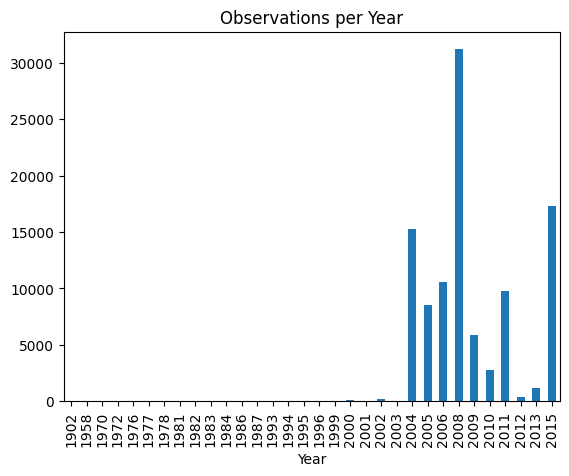

In [23]:

year_group.plot(kind='bar', title='Observations per Year')
plt.show()

In [24]:
from scipy.stats import f_oneway

groups = [group['DepthInMeters'].values for name, group in df.groupby('VernacularNameCategory')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA Test: F-statistic = {f_stat}, p-value = {p_val}")

ANOVA Test: F-statistic = 1878.3539666332385, p-value = 0.0


In [26]:
df['TimeChunk'] = pd.cut(data['Year'], bins=[1900, 1950, 1970, 1980, 1990, 2000, 2010], labels=['1900s', '1950s', '1970s', '1980s', '1990s','2000s' ])

# Compare metrics between time chunks
time_comparison = df.groupby('TimeChunk').agg({
    'ScientificName': 'nunique', 
    'DepthInMeters': ['mean', 'std']
})
print(time_comparison)


          ScientificName DepthInMeters            
                 nunique          mean         std
TimeChunk                                         
1900s                  5    344.571429  235.512107
1950s                  5    322.333333  216.435364
1970s                 29    564.125000  488.661447
1980s                 44    598.272727  384.706060
1990s                 23    314.738095  455.166198
2000s                240    483.179419  535.545267


/var/folders/h1/27wmhbx15cj_83mpv2j0wd100000gn/T/ipykernel_16334/2886989088.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_comparison = df.groupby('TimeChunk').agg({
